In [1]:
import sys
import numpy as np

from pyDFCSR_2D import CSR2D
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from pyDFCSR_2D.tools import plot_surface

## Run DFCSR

In [2]:
testCSR = CSR2D(input_file= 'input/chicane_config.yaml')

start reinterpolation. number of slice 1


In [3]:
testCSR.run()

Starting the DFCSR run
Wakes written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output\chicane-2024-06-17T20_40_52-07_00-wakes.h5
Finish step 1, s = 0.1,  in 9.828049659729004 seconds
Finish step 2, s = 0.2,  in 9.247365236282349 seconds
Finish step 3, s = 0.30000000000000004,  in 8.893451929092407 seconds
Finish step 4, s = 0.4,  in 8.67895221710205 seconds
Finish step 5, s = 0.5,  in 8.773091077804565 seconds
Finish step 6, s = 0.6,  in 8.89777684211731 seconds
start reinterpolation. number of slice 8
Finish step 7, s = 0.7000000000000001,  in 9.903727293014526 seconds
Finish step 8, s = 0.8,  in 0.4875621795654297 seconds
Finish step 9, s = 0.9,  in 0.531752347946167 seconds
Finish step 10, s = 1.0,  in 0.5361270904541016 seconds
Finish step 11, s = 1.1,  in 0.5009036064147949 seconds
start reinterpolation. number of slice 13
Finish step 12, s = 1.2000000000000002,  in 16.158832550048828 seconds
Finish step 13, s = 1.3000000000000003,  in 0.9203753471374512 seconds
Finish

## Parallel Run with MPI

In [ ]:
import pyDFCSR_mpi_run

In [ ]:
# input yaml file in "./input/dipole_config.yaml"
#salloc --partition milano --account ad:beamphysics -N 1 -n 10 /usr/lib64/openmpi/bin/mpirun python  -m pyDFCSR_mpi_run ./input/dipole_config.yaml
!mpirun -n 4 python  -m pyDFCSR_mpi_run.py ./input/chicane_config.yaml

## Plot Output

In [4]:
from pyDFCSR_2D.postprocessor import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'chicane-2024-06-17T20_40_52-07_00',
                             work_dir = './output')

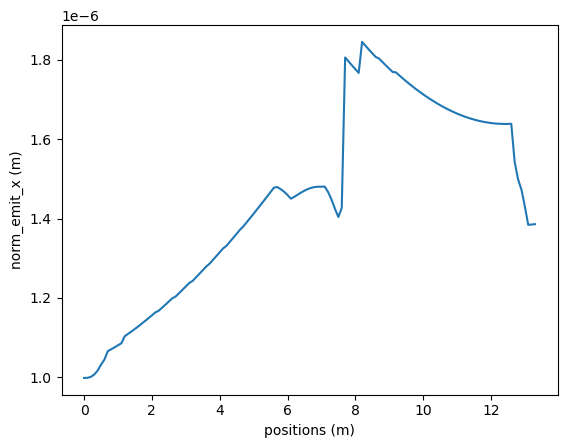

In [5]:
# Plot beam size along the lattice
x, y = DFplot.get_statistics(key = 'norm_emit_x', show_plot = True)

plot longitudinal wakes at nearest point s  = 7.599999999999999 m, step count 76
ebeam energy 5000000026.315029


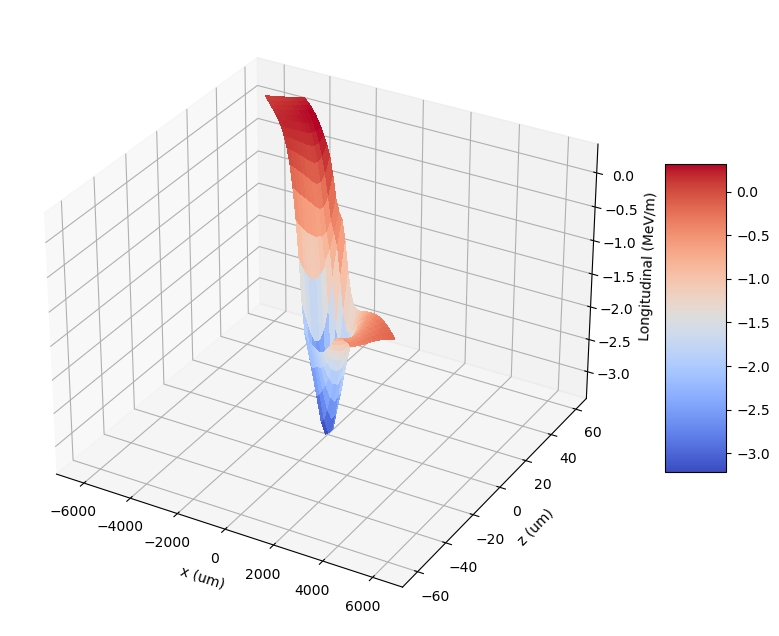

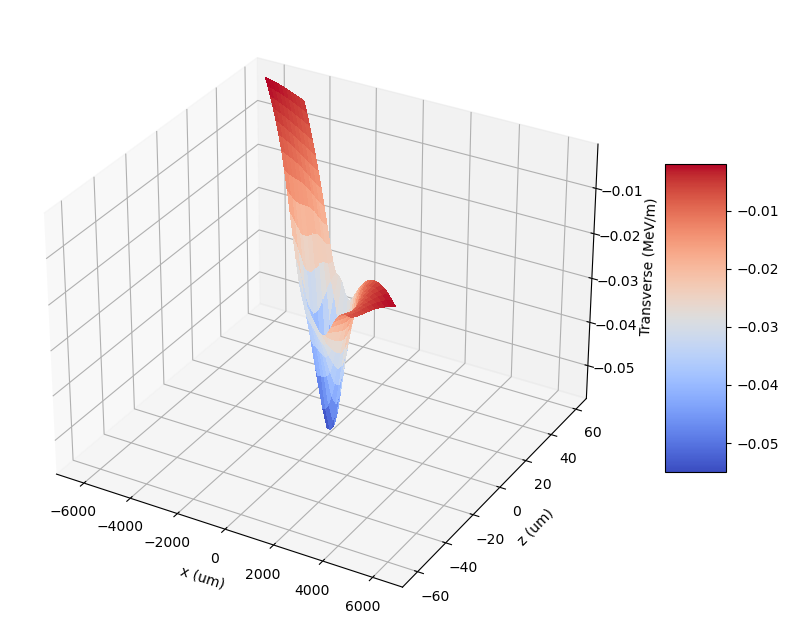

In [7]:
x_grids, z_grids, xkicks, dE_dct = DFplot.get_wakes(s =7.6, show_plot = True)

Reading  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output\chicane-2024-06-17T20_40_52-07_00-particles-end.h5


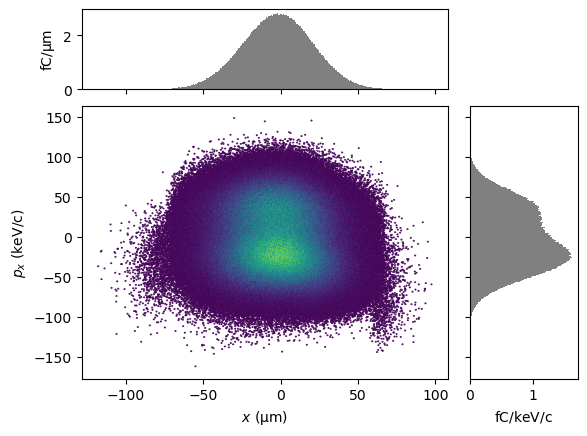

In [8]:
from pmd_beamphysics.plot import density_and_slice_plot
pg  = DFplot.get_particles()
pg.plot('x', 'px')